<h1> EXPLORATORY DATA ANALYSIS </h1> 
<h2>Team 1: Saritha Ramkumar, Luis Almanzo (01/30/2019) <h2>
<h3> Reading the data </h3>


In [264]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['SalePrice']= 'NA'

print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [265]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 81)


In [266]:
df_train = df_train.drop('Id', 1)
df_test = df_test.drop('Id', 1)

#df_train = df_train.append(df_test)

<h3>Response Variable Analysis</h3>

In [267]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

mpl.style.use('ggplot')

In [268]:
print(df_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<h4>Histogram of Sales price </h4>

In [269]:
count, bin_edges = np.histogram(df_train['SalePrice'],100)

print(count) # frequency count
print(bin_edges)

[ 5  0  5  6  6  7 32 29 23 35 59 67 73 92 89 91 62 60 57 73 67 54 45 33 30
 31 31 33 26 23 17 19 18 18 14 11  5  8 13 12 10  6  6  5  1  3  5  6  5  4
  3  2  3  1  3  1  2  2  0  2  0  1  1  0  1  0  0  0  0  1  0  0  2  0  0
  0  1  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1]
[  34900.   42101.   49302.   56503.   63704.   70905.   78106.   85307.
   92508.   99709.  106910.  114111.  121312.  128513.  135714.  142915.
  150116.  157317.  164518.  171719.  178920.  186121.  193322.  200523.
  207724.  214925.  222126.  229327.  236528.  243729.  250930.  258131.
  265332.  272533.  279734.  286935.  294136.  301337.  308538.  315739.
  322940.  330141.  337342.  344543.  351744.  358945.  366146.  373347.
  380548.  387749.  394950.  402151.  409352.  416553.  423754.  430955.
  438156.  445357.  452558.  459759.  466960.  474161.  481362.  488563.
  495764.  502965.  510166.  517367.  524568.  531769.  538970.  546171.
  553372.  560573.  567774.  574975.  

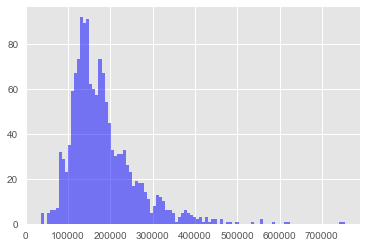

In [270]:
# the histogram of the data
n, bins, patches = plt.hist(df_train['SalePrice'], 100, facecolor='blue', alpha=0.5)

<h3> Correlation Analysis <h3>

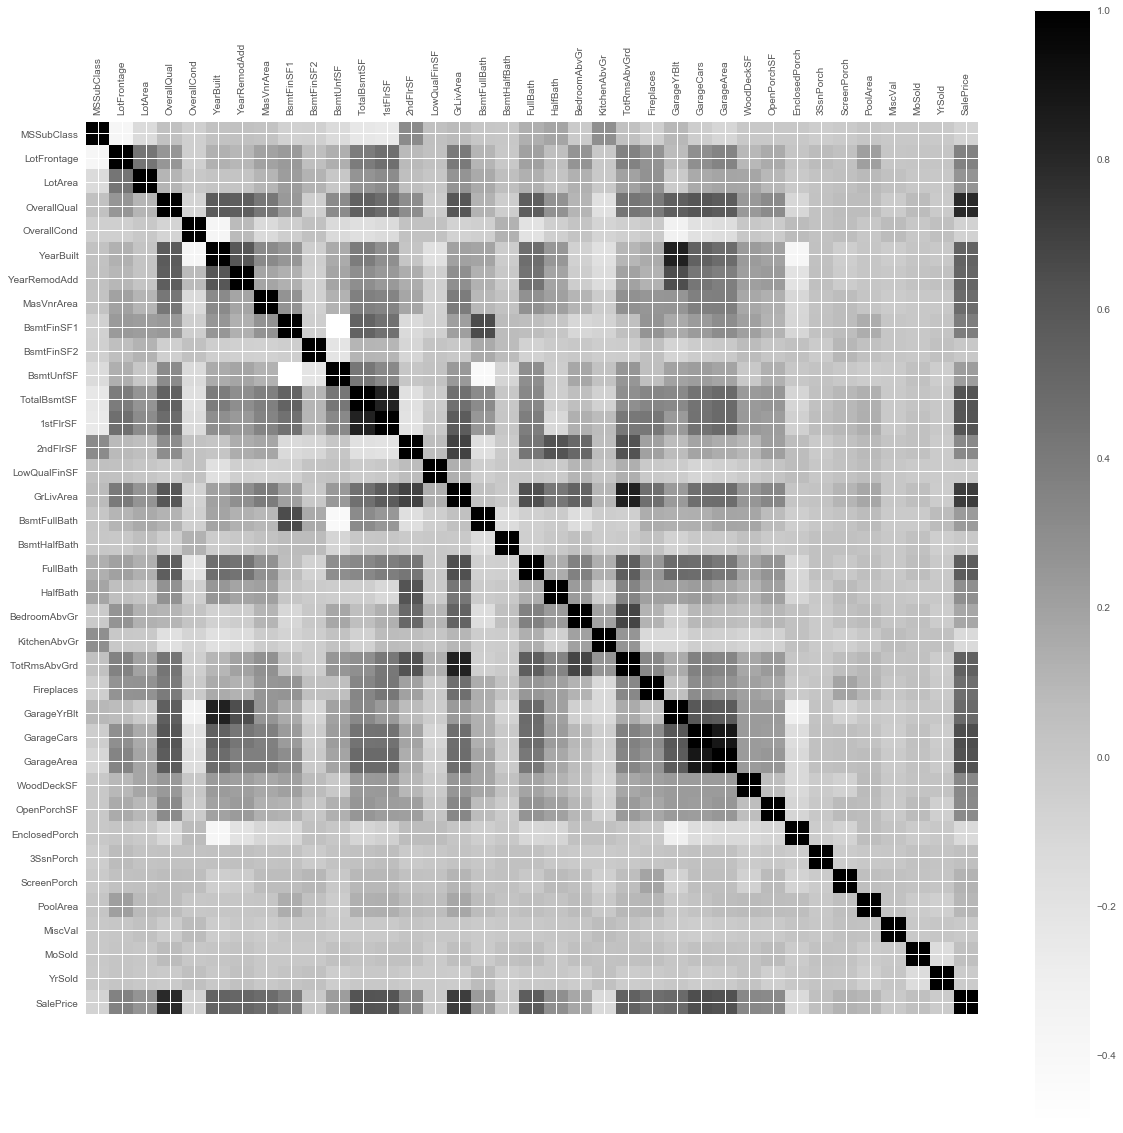

In [271]:
df_train_numeric=  df_train.select_dtypes(include=[np.number])

corr = df_train_numeric.corr() # df is the pandas dataframe


fignum=plt.figure(figsize=(20,20))

plt.matshow(df_train_numeric.corr(),fignum=fignum.number)
plt.xticks(range(len(df_train_numeric.columns)), df_train_numeric.columns)
plt.yticks(range(len(df_train_numeric.columns)), df_train_numeric.columns)
plt.colorbar()
plt.xticks(rotation=90)
plt.show()


In [272]:


def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=37):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

c1 = get_top_abs_correlations(corr, 10)
c1.sort_values(ascending = False)

GarageCars    GarageArea      0.986893
YearBuilt     GarageYrBlt     0.973774
TotalBsmtSF   1stFlrSF        0.966199
OverallQual   SalePrice       0.961367
GrLivArea     TotRmsAbvGrd    0.944780
YearRemodAdd  GarageYrBlt     0.904348
GarageCars    SalePrice       0.902426
OverallQual   GarageCars      0.901595
GarageArea    SalePrice       0.898929
YearBuilt     YearRemodAdd    0.881460
dtype: float64

 #### <u>Top items correlated to SalePrice</u>

In [273]:
corr['SalePrice'].sort_values(ascending=False)[1:6]

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

<u>Analysis</u>

The numeric values highly correlated with the SalePrice are:
     - Overall Quality
     - Above Grade (Ground) Living Area (square feet)
     - Size of garage in car capacity
     - Size of garage in square feet(Highly correlated to the Garage cars, We may consider only one in our analysis.)
     - Total square feet of basement area

<h4>Overall Quality</h4>

Clearly, Overall Quality has the highest correlation with SalePrice . Overall Quality is a Ordinal Variable with values raniging from 1(very poor) to 10(very excellent)

C:\Users\816621\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


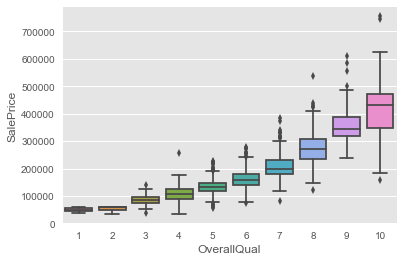

In [274]:
import seaborn as sns

ax = sns.boxplot(x="OverallQual", y="SalePrice", data=df_train)

<u>Analysis: </u>

 - Positive Correlation 
 - Outliers- Grade 4, Grade 8, Grade 9 and Grade 10. 

<h4>GrLivArea </h4>

Bigger houses are costlier

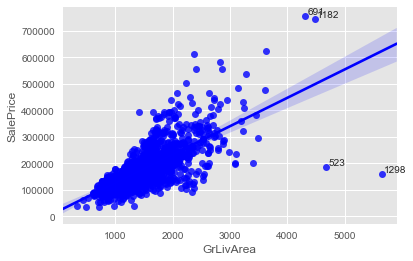

In [275]:
#from pandas.api.types import is_numeric_dtype

#print(is_numeric_dtype(df_train['SalePrice']))
      
ax=sns.regplot(x="GrLivArea", y="SalePrice",color="b", data=df_train.dropna(subset=['SalePrice']))

head = df_train.dropna(subset=['GrLivArea']).sort_values(by=['GrLivArea'], ascending=[False]).head(4)


def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(ind, xy=(r["GrLivArea"], r["SalePrice"]), 
            xytext=(2,2) , textcoords ="offset points", )

for row in head.iterrows():
    ann(row)
plt.show()

In [276]:
df_train.loc[[523,1298,691,1182],['GrLivArea','SalePrice','OverallQual']]

,GrLivArea,SalePrice,OverallQual
523,4676,184750,10
1298,5642,160000,10
691,4316,755000,10
1182,4476,745000,10


<u>Analysis:</u>

 - Essentially, tehre are 4 houses with sq ft area > 4000 and high overall quality,out of which  two of them have were sold for aound 750K, while the other two for around 180K  Since the overall trend  between the Gr living area and Sale price is upwards, we might think of the two houses sold for 180k as of outliers. 

## Imputing Missing Values

In [277]:
columns = df_train.columns
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
count_missing = df_train.isnull().sum()
missing_value_df = pd.DataFrame({'count_missing':count_missing,'percent_missing': percent_missing})
print(missing_value_df.sort_values('percent_missing',ascending=False)[0:15])

              count_missing  percent_missing
PoolQC                 1453        99.520548
MiscFeature            1406        96.301370
Alley                  1369        93.767123
Fence                  1179        80.753425
FireplaceQu             690        47.260274
LotFrontage             259        17.739726
GarageYrBlt              81         5.547945
GarageCond               81         5.547945
GarageType               81         5.547945
GarageFinish             81         5.547945
GarageQual               81         5.547945
BsmtExposure             38         2.602740
BsmtFinType2             38         2.602740
BsmtCond                 37         2.534247
BsmtQual                 37         2.534247


<h4>PoolQC</h4>

PoolQC variable has the max NAs. In the data description text, NA in this column implies No Pool; Hence it is not a missing value, It is a new category as such. 

      - Ex	Excellent
      - Gd	Good
      - TA	Average/Typical
      - Fa	Fair
      - NA	No Pool



In [278]:
df_train['PoolQC'].fillna('NP',inplace=True)
df_train['PoolQC'].value_counts()

NP    1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64

C:\Users\816621\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


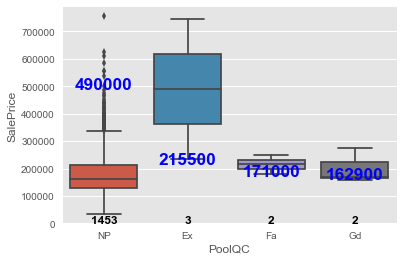

In [279]:
ax = sns.boxplot(x="PoolQC", y="SalePrice", data=df_train)

freq = df_train['PoolQC'].value_counts()
freq_labels = [str(np.round(s, 2)) for s in freq]

pos = range(len(freq))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], freq[tick] , freq_labels[tick], 
            horizontalalignment='center', size='large', color='black', weight='bold')
    
medians = df_train.groupby(['PoolQC'])['SalePrice'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='xx-large', color='blue', weight='semibold')

In [280]:
mapper = {'NP':0, 'Fa':1, 'TA':2, 'Gd':3,'Ex':4}
df_train['PoolQC'] = df_train['PoolQC'].replace(mapper)

<h4>MiscFeature</h4>

MiscFeature variable has the second max NAs. In the data description text, NA in this column implies No Pool; Hence it is not a missing value, It is a new category as such. 
       - Elev - Elevator
       - Gar2 - 2nd Garage (if not described in garage section)
       - Othr - Other
       - Shed - Shed (over 100 SF)
       - TenC - Tennis Court
       - NA	- None

C:\Users\816621\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


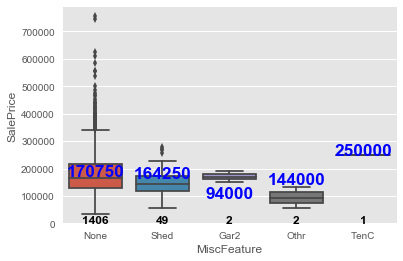

In [281]:
df_train['MiscFeature'].fillna('None',inplace=True)
df_train['MiscFeature'].value_counts()

ax = sns.boxplot(x="MiscFeature", y="SalePrice", data=df_train)

freq = df_train['MiscFeature'].value_counts()
freq_labels = [str(np.round(s, 2)) for s in freq]

pos = range(len(freq))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], freq[tick] , freq_labels[tick], 
            horizontalalignment='center', size='large', color='black', weight='bold')
    
medians = df_train.groupby(['MiscFeature'])['SalePrice'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='xx-large', color='blue', weight='semibold')

We could do the same for the enxt 2 most missing columns too.
- Alley
- Fence


C:\Users\816621\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


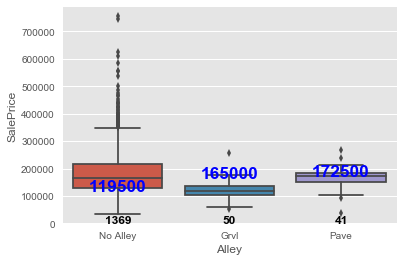

In [282]:
df_train['Alley'].fillna('No Alley',inplace=True)
df_train['Alley'].value_counts()

ax = sns.boxplot(x="Alley", y="SalePrice", data=df_train)

freq = df_train['Alley'].value_counts()
freq_labels = [str(np.round(s, 2)) for s in freq]

pos = range(len(freq))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], freq[tick] , freq_labels[tick], 
            horizontalalignment='center', size='large', color='black', weight='bold')

medians = df_train.groupby(['Alley'])['SalePrice'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='xx-large', color='blue', weight='bold')

C:\Users\816621\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


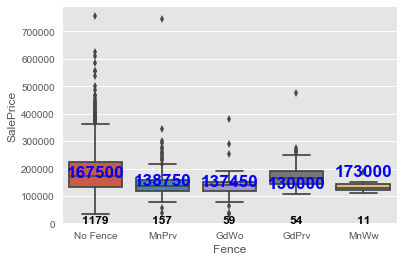

In [283]:
df_train['Fence'].fillna('No Fence',inplace=True)
df_train['Fence'].value_counts()

ax = sns.boxplot(x="Fence", y="SalePrice", data=df_train)

freq = df_train['Fence'].value_counts()
freq_labels = [str(np.round(s, 2)) for s in freq]

pos = range(len(freq))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], freq[tick] , freq_labels[tick], 
            horizontalalignment='center', size='large', color='black', weight='bold')
    
medians = df_train.groupby(['Fence'])['SalePrice'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='xx-large', color='blue', weight='bold')

In [284]:
df_train['MiscFeature'] = df_train['MiscFeature'].astype('category')
df_train['Alley'] = df_train['Alley'].astype('category')
df_train['Fence'] = df_train['Fence'].astype('category')

Next 2 columns with the max NAs are FireplaceQu  and LotFrontage  

FireplaceQu: Fireplace quality

      -   Ex	Excellent - Exceptional Masonry Fireplace
      -   Gd	Good - Masonry Fireplace in main level
      -   TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
      -   Fa	Fair - Prefabricated Fireplace in basement
      -   Po	Poor - Ben Franklin Stove
      -   NA	No Fireplace

LotFrontage: Linear feet of street connected to property

C:\Users\816621\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


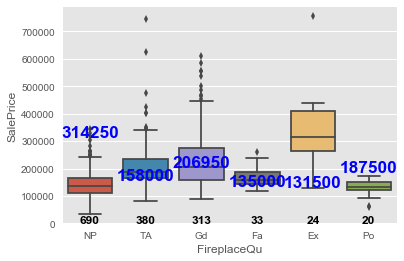

In [285]:
df_train['FireplaceQu'].fillna('NP',inplace=True)
df_train['FireplaceQu'].value_counts()
ax = sns.boxplot(x="FireplaceQu", y="SalePrice", data=df_train)

freq = df_train['FireplaceQu'].value_counts()
freq_labels = [str(np.round(s, 2)) for s in freq]

pos = range(len(freq))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], freq[tick] , freq_labels[tick], 
            horizontalalignment='center', size='large', color='black', weight='bold')
    
medians = df_train.groupby(['FireplaceQu'])['SalePrice'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='xx-large', color='blue', weight='bold')
    
mapper = {'NP':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4,'Ex':5}
df_train['FireplaceQu'] = df_train['FireplaceQu'].replace(mapper)


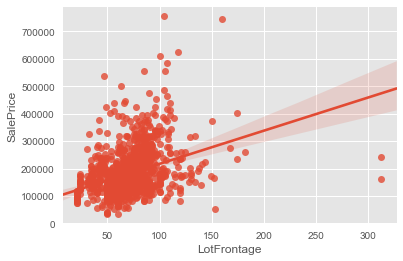

In [290]:
ax = sns.regplot(x="LotFrontage", y="SalePrice", data=df_train)
